# Classifying Dog Images with Tensorflow and Keras

In [38]:
# Load libraries and packages needed for image classification project
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from IPython.display import HTML


In [39]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./Images")

Found 832 files belonging to 5 classes.


In [40]:
# set the breed of dogs that the program will be classifying 
breeds = dataset.class_names
breeds

['n02088466-bloodhound',
 'n02089973-English_foxhound',
 'n02091032-Italian_greyhound',
 'n02091635-otterhound',
 'n02093256-Staffordshire_bullterrier']

In [41]:
# Set the arguments for the tensorflow instance
args = {
    'labels':'inferred',          # Infers the name of the dog by the name of the directory the picture is in
    'label_mode':'categorical',   # Each breed is one category
    'batch_size': 32,             # how many images are loaded and processed at once by neural network
    'image_size': (224,224),      # resize all images to the same size 
    'seed': 1,                    # set seed for reproducability
    'validation_split': .2,       # split training and testing : 80% train and 20% test
    'class_names': breeds         # name of the categories
}

In [42]:
# Training data 

train = tf.keras.utils.image_dataset_from_directory(           # Loads images from directory into tensorflow training dataset
    './Images',
    subset='training',
    **args
)

Found 832 files belonging to 5 classes.
Using 666 files for training.


In [43]:
# Test Data

test = tf.keras.utils.image_dataset_from_directory(           # Loads images from directory into tensorflow  testing dataset
    './Images',
    subset='validation',
    **args
)

Found 832 files belonging to 5 classes.
Using 166 files for validation.


In [44]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

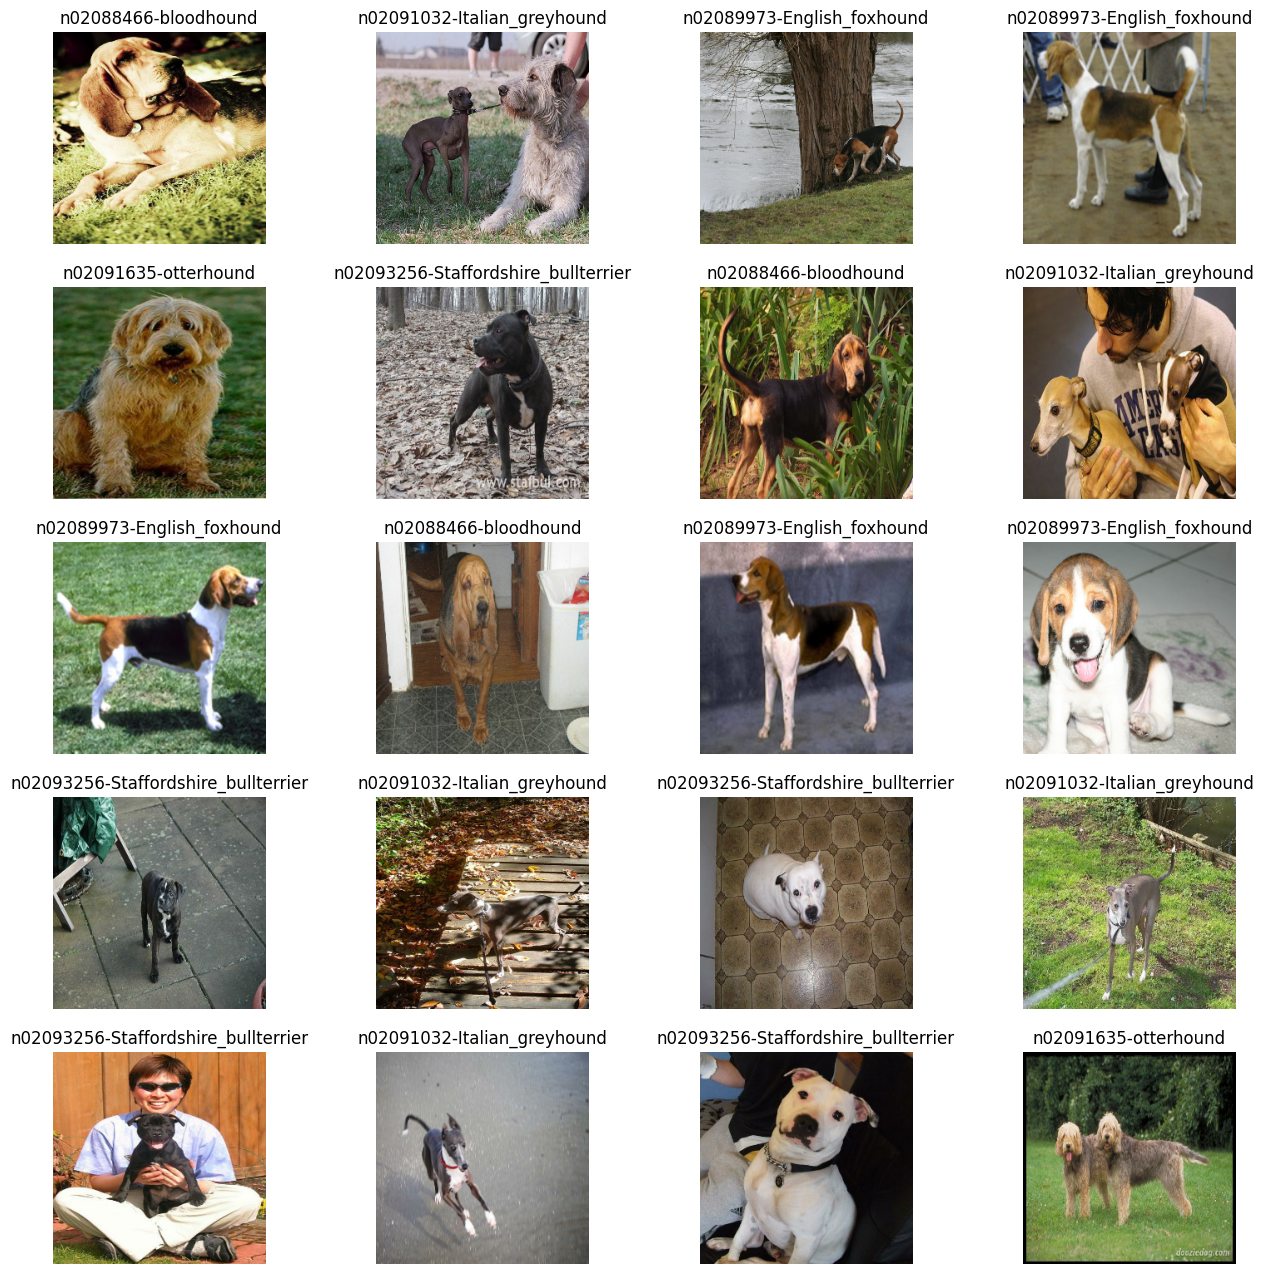

In [48]:
plt.figure(figsize=(16, 16))
for image_batch, labels_batch in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(breeds[labels_batch[i]])
        plt.axis("off")

In [51]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)   # Caches pictures in memory rather than hard disk to make algorithm more efficient
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)   # Caches pictures in memory rather than hard disk to make algorithm more efficient


In [52]:
# import keras packages for modeling and build sequential model

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential ([
    layers.Rescaling(1./255),    # Pixels in numpy array are from 0 - 255, so we rescale the pixels into numbers between 0-1 in order to help neural network be more efficient
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(224,224,3)), # Create a convulutional layer that scans images and generates new matrices with features from the images, will do this 16 times, looking at 3x3 pixels nat a time(window)
    layers.Flatten(),
    layers.Dense(128,activation='relu'),  # dense network will take flattened layer and help facilitate predictions
    layers.Dense(64,activation='relu'),  
    #layers.Dense(len(breeds)),
    layers.Dense(len(breeds), activation='softmax')
])

In [53]:
# Compile the model

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics =['accuracy'])     # optimizer tells model how to predict error and how to iterate, and loss function calculates error

In [54]:
# fit the model

history = model.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)

Epoch 1/10


C:\Users\akims\PycharmProjects\methodo\venv\lib\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


21/21 [==============================] - 52s 2s/step - loss: 20.0161 - accuracy: 0.2477 - val_loss: 4.2234 - val_accuracy: 0.2651
Epoch 2/10
21/21 [==============================] - 49s 2s/step - loss: 2.3838 - accuracy: 0.3529 - val_loss: 2.4400 - val_accuracy: 0.3313
Epoch 3/10
21/21 [==============================] - 37s 2s/step - loss: 1.4425 - accuracy: 0.5030 - val_loss: 2.1353 - val_accuracy: 0.3795
Epoch 4/10
21/21 [==============================] - 35s 2s/step - loss: 0.7721 - accuracy: 0.7553 - val_loss: 1.9346 - val_accuracy: 0.4096
Epoch 5/10
21/21 [==============================] - 33s 2s/step - loss: 0.4679 - accuracy: 0.8619 - val_loss: 1.9214 - val_accuracy: 0.4217
Epoch 6/10
21/21 [==============================] - 34s 2s/step - loss: 0.3297 - accuracy: 0.9324 - val_loss: 2.5951 - val_accuracy: 0.3313
Epoch 7/10
21/21 [==============================] - 34s 2s/step - loss: 0.2125 - accuracy: 0.9595 - val_loss: 2.0660 - val_accuracy: 0.4277
Epoch 8/10
21/21 [============

CNN-En apprentissage automatique, un réseau de neurones convolutifs ou réseau de neurones à convolution est un type de réseau de neurones artificiels acycliques, dans lequel le motif de connexion entre les neurones est inspiré par le cortex visuel des animaux.

Flating-Dans un CNN, il existe une couche aplatie entre la couche finale de mise en commun et la première couche dense. La couche aplatie est une colonne unique qui contient les données d'entrée pour la partie MLP dans un CNN.

En général, à chaque fois que le nombre d'époques augmente, la perte diminue et la précision augmente. Mais avec val_loss et val_acc, plusieurs cas sont possibles :

    val_loss commence à augmenter, val_acc commence à diminuer (ce qui signifie que le modèle bourre les valeurs et n'apprend pas).

    val_loss commence à augmenter, val_acc augmente également (cela peut être un cas d'overfitting ou de valeurs de probabilité diverses dans le cas où softmax est utilisé dans la couche de sortie).

    val_loss commence à diminuer, val_acc commence à augmenter (correct, signifie que le modèle construit apprend et fonctionne bien).
    Accuracy -pour évaluer la précision de la prédiction du modèle par rapport aux données réelles.
    
    L'ensemble de validation est utilisé après la formation du réseau neuronal. Il sert à régler les hyperparamètres du réseau et à comparer l'effet de leurs modifications sur la précision prédictive du modèle. Alors que l'ensemble de formation peut être considéré comme utilisé pour construire les poids de porte du réseau neuronal, l'ensemble de validation permet un réglage fin des paramètres ou de l'architecture du modèle de réseau neuronal.
    
 Classe MaxPooling2D de Keras

Après avoir créé la couche de convolution, l'étape suivante consiste à créer la couche de mise en commun. Les couches de convolution et de mise en commun sont utilisées ensemble comme des paires. Il existe deux types d'opérations de mise en commun : La mise en commun maximale et la mise en commun moyenne. Ici, nous utilisons la mise en commun maximale


In [55]:
# Summary of the model and its layers / how they are working

model.summary()

# Rescaling layer output the images and rescaled them
# Convulutional layer created 16 matrices of image features
# flattening layer flatened matrices into one lon vector
# Dense layer took that vector and use dit to make prediction
# Dense_3 seperated a single vector for each image indicating which class it belongs to

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 flatten_2 (Flatten)         (None, 802816)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               102760576 
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 5)                 325       
                                                                 
Total params: 102,769,605
Trainable params: 102,769,60

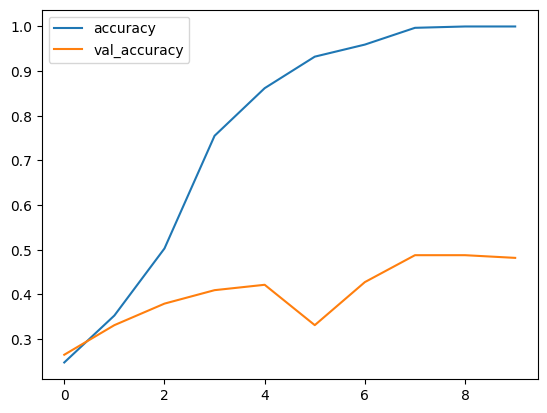

In [56]:
# Graph model accuracy with pandas
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
history_df[['accuracy','val_accuracy']].plot();

# Training accuracy went up but validation accuracy did not
# model may be overfit - random features are being implemented by model

In [57]:
# Account for overfitting and increas emodel accuracy
# paste model from before into function so as to not have to change the code every time

def train_model(model,epochs=10):
    model = Sequential(model)
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics =['accuracy'])
    history = model.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df,model

In [58]:
# same netwrok as before, modified with new layers

network = [
    layers.Rescaling(1./255),    
    layers.Conv2D(16,4,padding='same',activation='relu',input_shape=(224,224,3)),     # increase window size to 4 from 3
    layers.MaxPooling2D(),                                                            # add max pooling 2d layer to reduce overfit and reduce number of parameters
    layers.Conv2D(32,4,padding='same',activation='relu',input_shape=(224,224,3)),     # add second convolutional layer with increased filters to 32, to let network pick up higher level features
    layers.MaxPooling2D(),                                                           # add another max pooling layer
    layers.Conv2D(64,4,padding='same',activation='relu',input_shape=(224,224,3)),    # add another convolutional layer with 64 filters for even higher level features
    layers.MaxPooling2D(),                                                           # another max pooling layer
    layers.Dropout(.2),                                                              # Dropout layer helps with overfitting by setting some outputs to 0 randomly, so network doesnt become too linked to trainjing data
    layers.Flatten(),
    layers.Dense(128,activation='relu'),  
    layers.Dense(64,activation='relu'), 
    layers.Dense(len(breeds), activation='softmax')            
]

# run model again

history_df,model = train_model(network)

Epoch 1/10


C:\Users\akims\PycharmProjects\methodo\venv\lib\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


21/21 [==============================] - 29s 1s/step - loss: 1.6331 - accuracy: 0.2477 - val_loss: 1.5529 - val_accuracy: 0.3133
Epoch 2/10
21/21 [==============================] - 23s 1s/step - loss: 1.4575 - accuracy: 0.3829 - val_loss: 1.4921 - val_accuracy: 0.3554
Epoch 3/10
21/21 [==============================] - 28s 1s/step - loss: 1.2525 - accuracy: 0.4865 - val_loss: 1.4383 - val_accuracy: 0.4578
Epoch 4/10
21/21 [==============================] - 24s 1s/step - loss: 0.9998 - accuracy: 0.6171 - val_loss: 1.6126 - val_accuracy: 0.4398
Epoch 5/10
21/21 [==============================] - 23s 1s/step - loss: 0.7423 - accuracy: 0.7342 - val_loss: 1.7842 - val_accuracy: 0.4819
Epoch 6/10
21/21 [==============================] - 22s 1s/step - loss: 0.6456 - accuracy: 0.7823 - val_loss: 1.8477 - val_accuracy: 0.4880
Epoch 7/10
21/21 [==============================] - 24s 1s/step - loss: 0.4394 - accuracy: 0.8348 - val_loss: 2.0031 - val_accuracy: 0.4759
Epoch 8/10
21/21 [=============

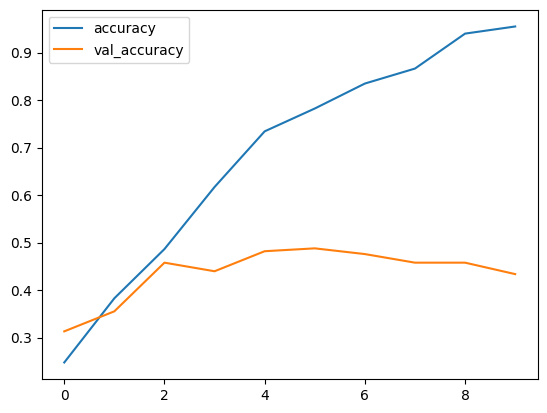

In [59]:
history_df[['accuracy','val_accuracy']].plot();  # not much of an accuracy increase: increase epochs and see changes

# Still overfitting

In [60]:
# Data augmentaion may help with overfitting with keras layers, set to a sequential layer
# set seeds for reproducibility 

data_augmentaion = tf.keras.Sequential([
    layers.RandomFlip('horizontal',seed=1),         # Randomly flips images from left to right which the model wuill see as a new image and increase accuracy
    layers.RandomRotation(.2,seed=1),               # Randomly raotates images for more information
    layers.RandomZoom(.2,seed=1)                   #randomly zooms images for more information for the model 
])

In [61]:
# add netwroks together to create full network

full_network = [data_augmentaion] + network


In [62]:
# Train the full network

history_df, model = train_model(full_network)

Epoch 1/10


C:\Users\akims\PycharmProjects\methodo\venv\lib\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


21/21 [==============================] - 29s 1s/step - loss: 1.5380 - accuracy: 0.4174 - val_loss: 1.3629 - val_accuracy: 0.4277
Epoch 2/10
21/21 [==============================] - 21s 982ms/step - loss: 1.2063 - accuracy: 0.5345 - val_loss: 1.3546 - val_accuracy: 0.5000
Epoch 3/10
21/21 [==============================] - 21s 986ms/step - loss: 1.0819 - accuracy: 0.5886 - val_loss: 1.3626 - val_accuracy: 0.4940
Epoch 4/10
21/21 [==============================] - 21s 988ms/step - loss: 1.0956 - accuracy: 0.5916 - val_loss: 1.3697 - val_accuracy: 0.5060
Epoch 5/10
21/21 [==============================] - 21s 982ms/step - loss: 0.9939 - accuracy: 0.6096 - val_loss: 1.4450 - val_accuracy: 0.5241
Epoch 6/10
21/21 [==============================] - 23s 1s/step - loss: 0.9641 - accuracy: 0.6426 - val_loss: 1.4982 - val_accuracy: 0.4940
Epoch 7/10
21/21 [==============================] - 20s 971ms/step - loss: 0.8726 - accuracy: 0.6667 - val_loss: 1.5149 - val_accuracy: 0.5060
Epoch 8/10
21/21

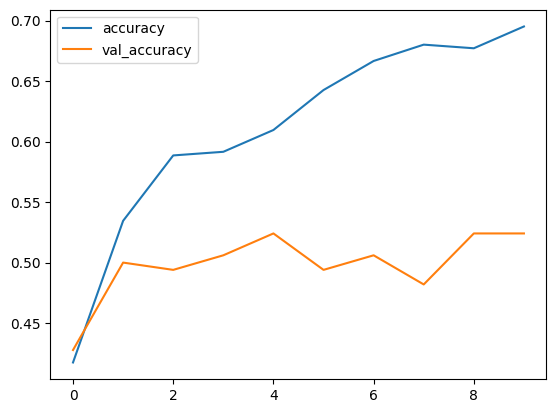

In [63]:
# Plot accuracy again

history_df[['accuracy','val_accuracy']].plot();

# Accuracy is much better now

In [64]:
# Pull predictions out and visulaize them 

preds = model.predict(test)    # large numpy array; convert to pandas dataframe to make it easier to work with


6/6 [==============================] - 1s 155ms/step


In [65]:
import numpy as np 

predicted_class = np.argmax(preds,axis=1)    # turns predictions into a single number


In [66]:
#Array of index of original breeds 

predicted_class

array([1, 2, 1, 1, 1, 4, 4, 2, 2, 3, 1, 3, 4, 1, 2, 4, 1, 0, 0, 0, 3, 3,
       2, 3, 3, 0, 4, 0, 2, 3, 3, 2, 2, 1, 3, 2, 4, 0, 3, 0, 1, 3, 3, 1,
       4, 2, 3, 2, 3, 2, 2, 4, 1, 0, 4, 0, 2, 2, 4, 2, 4, 2, 2, 4, 1, 3,
       0, 1, 3, 3, 1, 3, 0, 4, 0, 0, 1, 3, 4, 4, 0, 1, 3, 3, 4, 0, 4, 3,
       3, 2, 3, 1, 2, 0, 3, 3, 2, 1, 1, 4, 3, 1, 3, 0, 4, 3, 3, 3, 3, 0,
       0, 3, 3, 2, 4, 3, 2, 3, 2, 2, 3, 3, 1, 2, 3, 2, 3, 3, 0, 3, 2, 1,
       0, 3, 1, 0, 0, 3, 2, 1, 3, 4, 0, 0, 3, 1, 2, 0, 2, 3, 2, 3, 1, 0,
       2, 1, 2, 3, 2, 0, 0, 3, 2, 3, 0, 3], dtype=int64)

In [67]:
actual_labels = np.concatenate([y for x,y in test],axis=0)   # flattens out batches and pulls out labels

In [68]:
actual_labels   # they are vectors so change them to single numbers
actual_class = np.argmax(actual_labels,axis=1)

In [69]:
# Get actual images of the dogs

import itertools

actual_image = [x.numpy().astype('uint8') for x,y in test]
actual_image = list(itertools.chain.from_iterable(actual_image))
actual_image = [Image.fromarray(a) for a in actual_image]

In [70]:
# create datframe from predicted, actual, and the images of the dogs

pred_df = pd.DataFrame(zip(predicted_class,actual_class,actual_image),columns=['prediction','actual','image'])


In [71]:
# change dog breeds from numbers to the actual names

pred_df['prediction'] = pred_df['prediction'].apply(lambda x : breeds[x])
pred_df['actual'] = pred_df['actual'].apply(lambda x : breeds[x])



In [72]:
# Disply Head of dataframe

pred_df.head(20)


,prediction,actual,image
0,n02089973-English_foxhound,n02089973-English_foxhound,<PIL.Image.Image image mode=RGB size=224x224 a...
1,n02091032-Italian_greyhound,n02091032-Italian_greyhound,<PIL.Image.Image image mode=RGB size=224x224 a...
2,n02089973-English_foxhound,n02089973-English_foxhound,<PIL.Image.Image image mode=RGB size=224x224 a...
3,n02089973-English_foxhound,n02089973-English_foxhound,<PIL.Image.Image image mode=RGB size=224x224 a...
4,n02089973-English_foxhound,n02091032-Italian_greyhound,<PIL.Image.Image image mode=RGB size=224x224 a...
5,n02093256-Staffordshire_bullterrier,n02093256-Staffordshire_bullterrier,<PIL.Image.Image image mode=RGB size=224x224 a...
6,n02093256-Staffordshire_bullterrier,n02089973-English_foxhound,<PIL.Image.Image image mode=RGB size=224x224 a...
7,n02091032-Italian_greyhound,n02091635-otterhound,<PIL.Image.Image image mode=RGB size=224x224 a...
8,n02091032-Italian_greyhound,n02093256-Staffordshire_bullterrier,<PIL.Image.Image image mode=RGB size=224x224 a...
9,n02091635-otterhound,n02091635-otterhound,<PIL.Image.Image image mode=RGB size=224x224 a...
